
###Decision Trees Classifier and visualize it graphically



#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Ravikiran S Basutkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#GRIPAPRIL21

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7D5A16>GRIP - The Sparks Foundation</font></center>

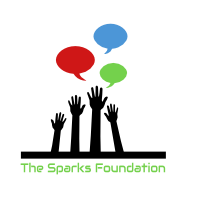

# <center><font color=15D77D>Task 6 : Creating a Decision Tree Classifier and visualize it graphically.</font></center>
### <center><font color=166E64>Problem Statement: </font><font color=AB3988>For the given 'Iris' dataset, create the Decision Tree classifier and visualize it graphically. </font>
>The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
%matplotlib inline
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,accuracy_score,r2_score
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=pd.read_csv("Iris.csv")

In [3]:
(iris.head(5))


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris1=iris.drop(['Id'],axis =1,inplace =False)

In [6]:
df=iris.drop(['Id','Species'],axis =1,inplace =False)

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [8]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=iris[['Species']]

In [10]:
y.head(5)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
print(y)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


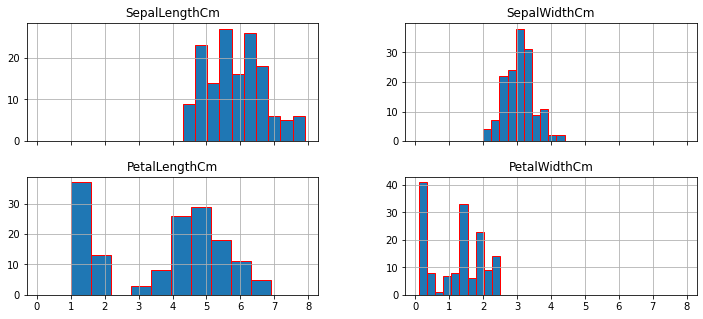

In [12]:
#Histograms
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12, 5))
df.hist(edgecolor="red",figsize=(8,4),ax=ax)
plt.show()

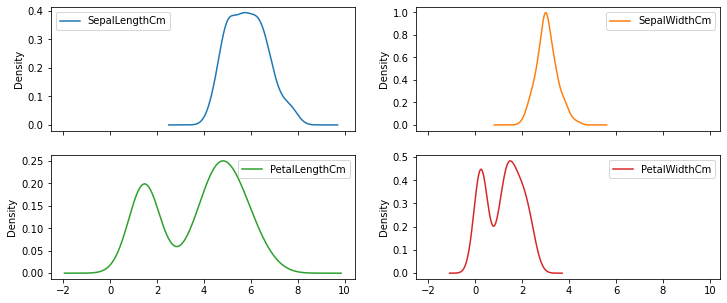

In [13]:
# Density plot
_, ax = plt.subplots(2,2, sharex=True, figsize=(12, 5))
df.plot(kind='density',ax=ax,subplots=True)
plt.show()

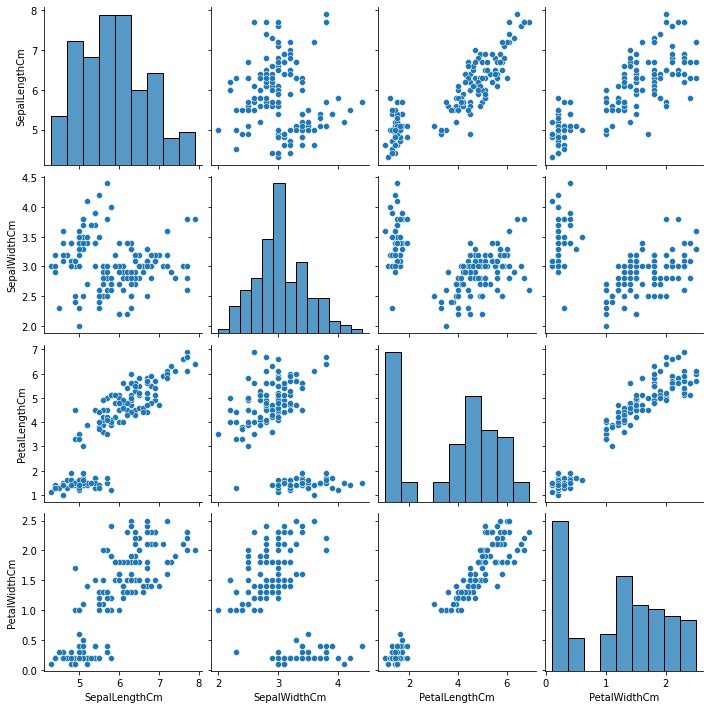

In [14]:
#pairplot
sns.pairplot(df)

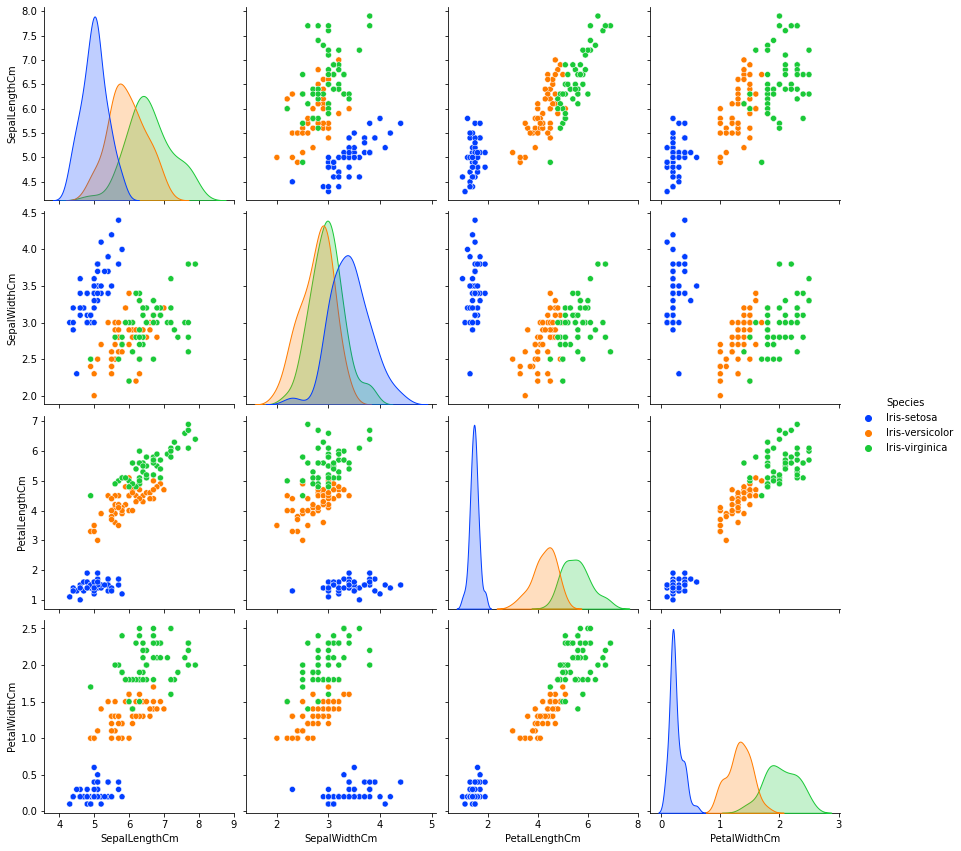

In [15]:
sns.pairplot(iris1,hue="Species",palette="bright",diag_kind="auto",size=3)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=0)

In [17]:
X_train.shape, y_train.shape

((112, 4), (112, 1))

In [18]:
X_test.shape, y_test.shape

((38, 4), (38, 1))

### Now let us define the Decision Tree Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

In [21]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9736842105263158
confusion_matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [22]:
from matplotlib import pyplot as plt
from sklearn import tree

In [23]:
features_names=list(df.columns)
#targets_names=list(y.columns)
targets_names=y['Species'].unique()
targets_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualize the Decision tree graph

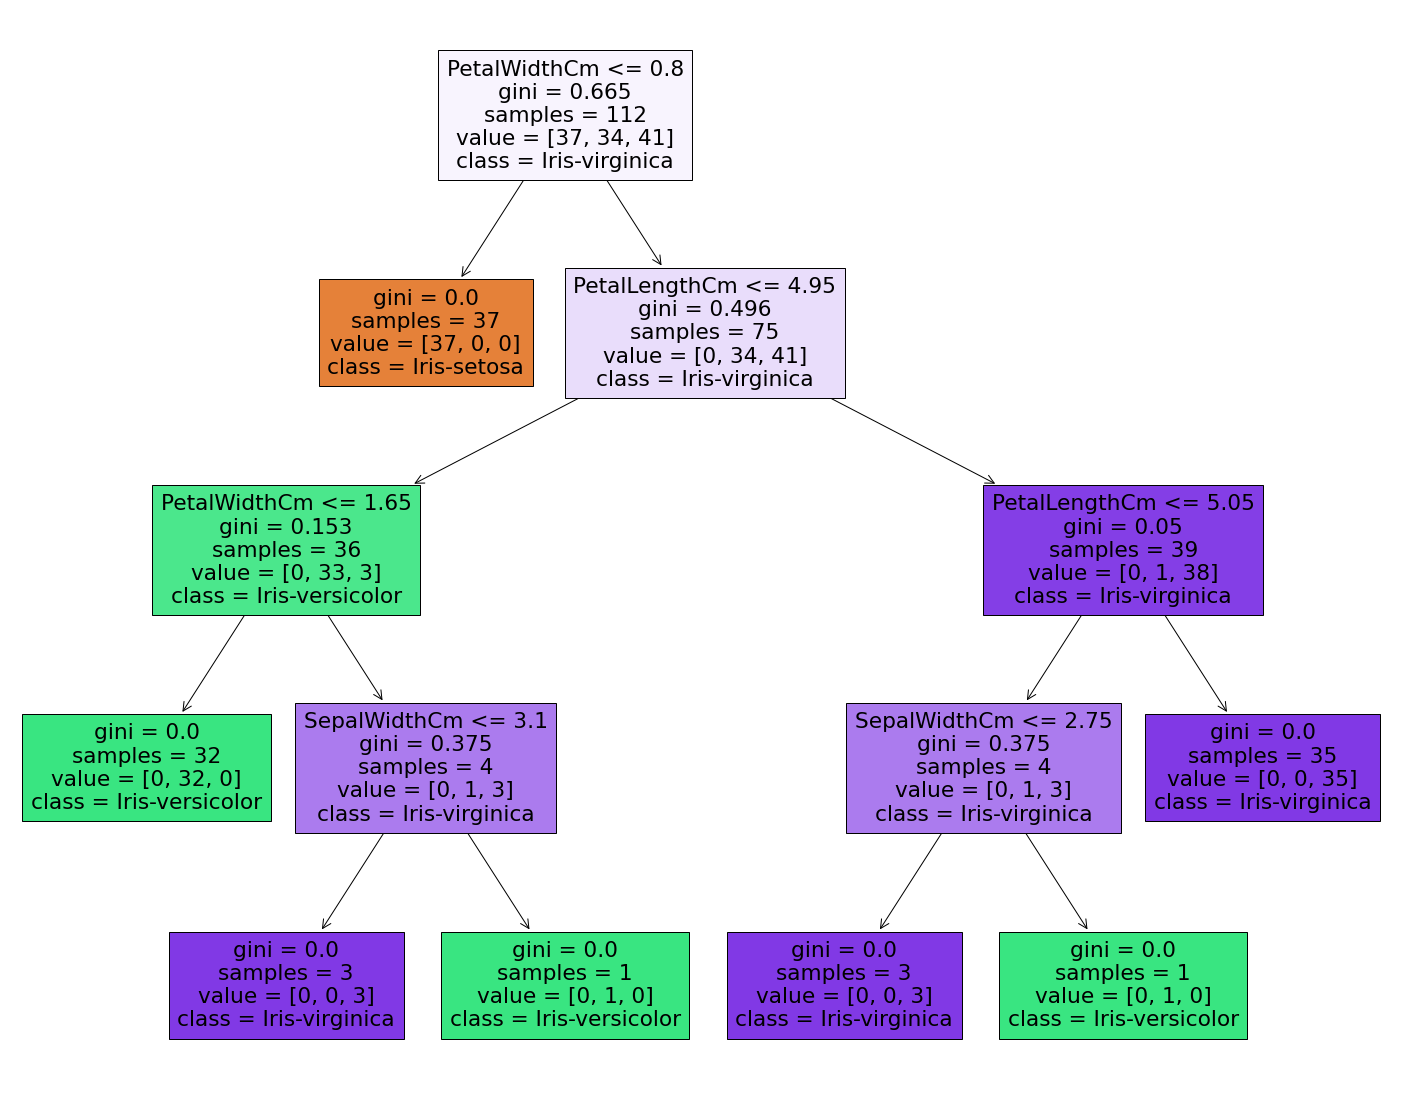

In [24]:
## Visualize the graph
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=features_names,  
                   class_names=targets_names,
                   filled=True)

In [25]:
fig.savefig("decision_tree11042021.png")

In [26]:
type(fig)

matplotlib.figure.Figure

In [27]:
#Plot Decision Tree with dtreeviz Package
#!pip install dtreeviz

In [28]:
#!pip install graphviz
#!conda install python-graphviz

In [29]:
import sklearn
sklearn.__version__

'0.23.2'

In [30]:
from dtreeviz.trees import dtreeviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz 2.44.1\bin'

In [31]:
import numpy as np
X=np.array(df)
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
Y = np.array(labelencoder.fit_transform(y))
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, Y)

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=features_names,  
                                class_names=targets_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph.view()



'decision_tree_graphivz.png'

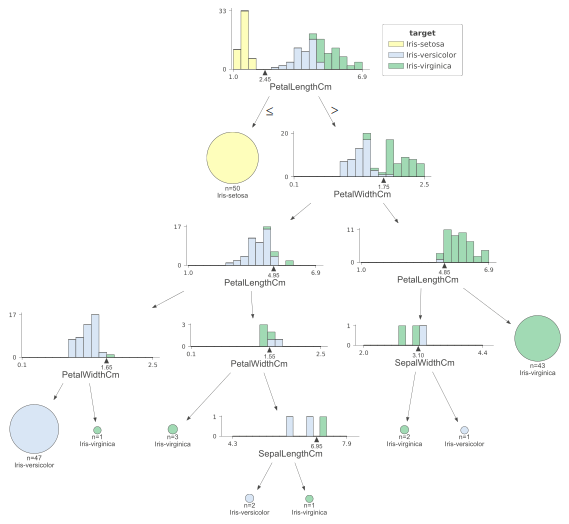

In [33]:
from dtreeviz.trees import dtreeviz 
viz = dtreeviz(clf,X, Y,
                target_name="target",
               feature_names=features_names,
                class_names=list(targets_names))
viz
#viz.view()
#viz.save("t.svg")
#type(viz)

In [34]:
from IPython.core.display import display, HTML
display(HTML(viz.svg()))

# THANK YOU :)